In [2]:
### Evaluacion de la ciclica de acuerdo a la fecha
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import datetime as dt
pd.options.display.max_columns = None
from datetime import timedelta
import glob as glob
import warnings
import os
import sys
warnings.filterwarnings("ignore", category=FutureWarning)
path="//10.1.1.7/01 Oficina Planeación y Control/01 Analytics/Stiven/Cobranzas/"
import zipfile
import seaborn as sns

now=dt.datetime.now().strftime('%Y%m%d')
now2=dt.datetime.now().strftime('%Y-%m-%d')
today = dt.date.today()
hoy=now
def condition():
    if today.strftime("%A")=='Monday':
        return (today - dt.timedelta(days=2)).strftime('%Y%m%d')
    else:
        return (today - dt.timedelta(days=1)).strftime('%Y%m%d')
yesterday=condition()
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler

In [3]:
os.chdir(path)
os.getcwd()

'\\\\10.1.1.7\\01 Oficina Planeación y Control\\01 Analytics\\Stiven\\Cobranzas'

In [4]:
############################################ Funciones para cargue  ########################################################
def open_files_hoy(paths):
        data = []
        for path1 in paths:
            zf = zipfile.ZipFile(path1)#Función de apertura de .zip
            data.append(pd.read_csv(#Función de lectura paralelizada
                        zf.open(zf.filelist[0].filename),#Abre el primer archivo del .zip
                        sep = "|", ## separación del archivo CSV
                        encoding = "utf-8",
                        dtype=str ## Leo todo en formato object,
                        )
                    )
        print(path,"Cargado!")
        return pd.concat(data,ignore_index = True)

In [5]:
pagos=pd.read_csv("Y:\Stiven\Movil\Cobranzas_movil_(Despliegue)\concatenado_IGC_completo_pruebas.csv",sep=';',encoding='utf-8',dtype=str)
seg=pd.read_csv(r"Y:\Stiven\Movil\Cobranzas_movil_(Despliegue)\asesores_concatenada.csv",sep=';',encoding='utf-8',dtype=str)
consolidado_ig=pd.read_csv(r'Y:\Stiven\Movil\Cobranzas_movil_(Despliegue)\concatenado_IGC_completo_pruebas.csv',sep=';',encoding='utf-8',dtype=str)

### Load IGC

In [6]:
file_paths=glob.glob("Y:/Stiven/Movil/Cobranzas_movil_(Despliegue)/Download_folder_Adminfo/*_IGC.zip")
igc = open_files_hoy(file_paths[:]) 

//10.1.1.7/01 Oficina Planeación y Control/01 Analytics/Stiven/Cobranzas/ Cargado!


In [7]:
igc["ESTATUS1"] =\
    np.where(igc["Número Traslado"].str.contains("23213|23214|23619",regex = True,na = False),"B2B MOVIL","B2C MOVIL")
igc['Fecha Asignación']=pd.to_datetime(igc['Fecha Asignación'],format='%Y-%m-%d',errors='coerce')
igc['Fecha Ultima Gestión ']=pd.to_datetime(igc['Fecha Ultima Gestión '],format='%Y-%m-%d',errors='coerce')
igc['DIAS SIN GESTION']=(dt.datetime.now()-igc['Fecha Ultima Gestión ']).dt.days
igc=pd.concat([consolidado_ig,igc])

In [8]:
# igc[igc[consolidado_ig.columns]].shape
# igc['Identificación']=igc['Identificación'].astype(str)
# df_cobranzas_2 = igc['Identificación'].drop_duplicates(keep='last') 
# np.savez_compressed('Y:\Francisco\Cedulas_Cobranzas.npz', df_cobranzas_2)
# df_cobranzas_2 = igc['Identificación'].drop_duplicates(keep='last') 

#%% DF Cobranzas
# df_cobranzas = pd.read_csv('//10.1.1.7//tigo//05 Campañas de Salidas//ANALYTICS//Tigo//Historicos//Cobranzas//concatenado_IGC_completo_pruebas.csv', delimiter=';',encoding='utf-8')
# df_cobranzas_2 = df_cobranzas['Identificación'].drop_duplicates()  
# Guardamos como archivos comprimidos en formato .npz
# np.savez_compressed('//10.1.1.7//tigo//05 Campañas de Salidas//ANALYTICS//Tigo//Historicos//Cobranzas//Cedulas_Cobranzas.npz', df_cobranzas_2 )

In [9]:

igc=igc[consolidado_ig.columns]
igc['Fecha Asignación']=pd.to_datetime(igc['Fecha Asignación'],format='%Y-%m-%d')
igc=igc.sort_values(['Identificación','Referencia Pago','Fecha Asignación'],ascending=True)
igc['llave']=igc['Referencia Pago']+"_"+igc['Fecha Asignación'].astype(str)
igc.drop_duplicates(['llave'],keep='last',inplace=True)
igc['Fecha Churn']=igc['Fecha Churn'].astype(str)
igc['Fecha Churn']=igc['Fecha Churn'].str.replace('(.*)\s.*', '\\1').str.replace('-','')
igc['Fecha Churn']=pd.to_datetime(igc['Fecha Churn'],format='%Y%m%d',errors='coerce')
igc['Marca Portafolio']=igc['Marca Portafolio'].str.strip()
igc['Antiguedad de Producto']=igc['Antiguedad de Producto'].str.replace('AntiguÃ³','Antigua').str.replace('En MaduraciÃ³n','En maduración')
igc['Fecha Asignación']=igc['Fecha Asignación'].astype(str).str.replace('(.*)\s.*', '\\1').str.replace('-','')
igc['Fecha Asignación']=pd.to_datetime(igc['Fecha Asignación'],format='%Y-%m-%d',errors='coerce')
igc['Fecha Asignación_año_mes']=(igc['Fecha Asignación'].dt.year).astype(str) +"_"+ (igc['Fecha Asignación'].dt.month).astype(str)
igc['Fecha Ultima Gestión ']=pd.to_datetime(igc['Fecha Ultima Gestión '],format='%Y-%m-%d',errors='coerce')
igc['Fecha Creación de Cuenta']=pd.to_datetime(igc['Fecha Creación de Cuenta'],format='%Y-%m-%d',errors='coerce')
igc['meses_desde_creacion']=(igc['Fecha Ultima Gestión ']-igc['Fecha Creación de Cuenta']).dt.days/365
igc['Fecha Actualizacion']=pd.to_datetime(igc['Fecha Actualizacion'],format='%Y-%m-%d',errors='coerce')
igc['DIAS SIN GESTION_act']=(igc['Fecha Actualizacion']-igc['Fecha Ultima Gestión ']).dt.days
igc['DIAS SIN GESTION_act']=np.where(igc['DIAS SIN GESTION_act'] > igc['DIAS SIN GESTION_act'].quantile(0.95),  igc['DIAS SIN GESTION_act'].quantile(0.95),igc['DIAS SIN GESTION_act'])
# ig=igc[igc['Fecha Asignación']>='2021-03-01']

<AxesSubplot:xlabel='DIAS SIN GESTION_act'>

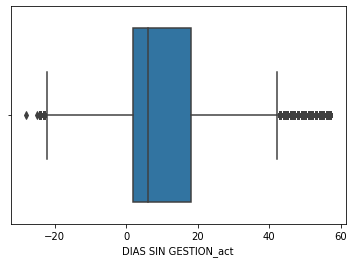

In [10]:
# file_paths=glob.glob(r"C:\Users\scadacat\Downloads\20211217_igc_selefin.zip")
# igc_sele = open_files_hoy(file_paths)
# igc_sele['pasado']=np.where(igc_sele['Referencia Pago'].isin(igc['Referencia Pago'].astype(str)),1,0)
# igc_sele['pasado'].value_counts()
# igc_sele.drop_duplicates('Referencia Pago')['pasado'].value_counts()
# igc['pasado']=np.where(igc['Referencia Pago'].isin(igc_sele['Referencia Pago'].astype(str)),1,0)
# igc.drop_duplicates('Referencia Pago')['pasado'].value_counts()

# igc[igc['pasado']==1]
# igc[igc['Fecha Asignación']>'2021-05-14'].shape
# igc['Fecha Asignación'].min()
sns.boxplot(igc['DIAS SIN GESTION_act'])

In [11]:
igc=igc[~igc.duplicated()]

In [12]:
# variables_consolidadas = variables_consolidadas.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
# igc.rename({'Fecha AsignaciÃ³n':'Fecha Asignación',
#                     'Fecha Ultima GestiÃ³n ':'Fecha Ultima Gestión',
#                     'Fecha CreaciÃ³n de Cuenta':'Fecha Creación de Cuenta',
#                     },inplace=True)
# igc['Fecha Asignación']=igc['Fecha Asignación'].str.replace('(.*)\s.*', '\\1').str.replace('-','')
# igc['Fecha Asignación']=pd.to_datetime(igc['Fecha Asignación'],format='%Y-%m-%d',errors='coerce')

# igc['Fecha AsignaciÃ³n_año_mes']=(igc['Fecha AsignaciÃ³n'].dt.year).astype(str) +"_"+ (igc['Fecha AsignaciÃ³n'].dt.month).astype(str)
# igc['Fecha Ultima GestiÃ³n ']=pd.to_datetime(igc['Fecha Ultima GestiÃ³n '],format='%Y-%m-%d',errors='coerce')
# igc['Fecha CreaciÃ³n de Cuenta']=pd.to_datetime(igc['Fecha CreaciÃ³n de Cuenta'],format='%Y-%m-%d',errors='coerce')
# igc['meses_desde_creacion']=(igc['Fecha Ultima GestiÃ³n ']-igc['Fecha CreaciÃ³n de Cuenta']).dt.days/365

########### Cuando tenga el cruce con pagos y no tengo ####### 

In [13]:
################### lectura de Pagos #####################

In [14]:
file_paths=glob.glob("D:/Proyecto Movil/Pagos/*.zip")
pagos = open_files_hoy(file_paths[:]) 
ig=igc[igc['Fecha Asignación']<='2021-12-01']
pagos['Fecha Pago']=pd.to_datetime(pagos['Fecha Pago'],format='%Y-%m-%d')
############# Delimito fecha con el objetivo de mejorar y evaluar posteriormente el modelo
pag=pagos[pagos['Fecha Pago']<='2021-12-01']
pag=pag[~pag.duplicated()]
pag=pag.sort_values(['Referencia Pago','Fecha Pago','Valor Pago'],ascending=True)
pag=pag.drop_duplicates(['Referencia Pago','Fecha Pago','Valor Pago'],keep='last')
dd=pd.merge(igc,
            pag[['Referencia Pago','Valor Pago', 'Fecha Pago','Identificacion Cliente','Detalle Pago']],
                left_on=['Identificación','Referencia Pago'],
                right_on=['Identificacion Cliente','Referencia Pago'],how='left')
dd=dd[~dd.duplicated()]
dd['Fecha Pago']=pd.to_datetime(dd['Fecha Pago'],format='%Y-%m-%d',errors='coerce')
dd['diff']=(dd['Fecha Pago']-dd['Fecha Asignación']).dt.days
dd['efectividad']=np.where(~dd['Fecha Pago'].isna(),'Pago','No Pago')
dd['fecha_xra_churn']=(dd['Fecha Churn']-dd['Fecha Asignación']).dt.days

//10.1.1.7/01 Oficina Planeación y Control/01 Analytics/Stiven/Cobranzas/ Cargado!


In [15]:
dd['diff']=(dd['Fecha Pago']-dd['Fecha Asignación']).dt.days
col         = 'diff'
col2=         'efectividad'
condi = [(dd[col]<-3) & (dd[col2]=='Pago'),  (dd[col].between(-3,38)) & (dd[col2]=='Pago'),(dd[col2]=='No Pago'),(~dd[col].between(-3,38)) & (dd[col2]=='Pago')]
seg_     = [ "No efectivo", 'efectivo', 'No efectivo','No efectivo'] 
dd["Efectivo_data"] = np.select(condi, seg_, default=np.nan)
dd['Efectivo_data']=(dd['Efectivo_data']=='efectivo').astype(int)
dd["diff_dias_chur_pago"] = (dd["Fecha Churn"] - dd["Fecha Pago"]).dt.days
## Creación historia
hist=dd[['Efectivo_data','diff_dias_chur_pago','Fecha Churn','Identificacion Cliente','Valor Pago']]

In [16]:
dd["diff_dias_chur_pago"] = (dd["Fecha Churn"] - dd["Fecha Pago"]).dt.days
dd['Valor a Cobrar']=dd['Valor a Cobrar'].astype(float)
dd['Fecha Asignación']=pd.to_datetime(dd['Fecha Asignación'],format='%Y-%m-%d',errors='coerce')
dd['Fecha Asignación_año_mes']=(dd['Fecha Asignación'].dt.year).astype(str) +"_"+ (dd['Fecha Asignación'].dt.month).astype(str)
dd['Fecha Ultima Gestión ']=pd.to_datetime(dd['Fecha Ultima Gestión '],format='%Y-%m-%d',errors='coerce')
dd['Fecha Creación de Cuenta']=pd.to_datetime(dd['Fecha Creación de Cuenta'],format='%Y-%m-%d',errors='coerce')
dd['meses_desde_creacion']=(dd['Fecha Ultima Gestión ']-dd['Fecha Creación de Cuenta']).dt.days/365

In [17]:
dd.drop(['Valor Pago','Facturación Credivalores','Fecha Pago','Region','Codigo regional tigo','Desconciliada','Regional', 'Estado Plan',
        'Identificacion Cliente','Detalle Pago','FLP','Grabador Gestión Masiva',
        'Fecha Gestión Masiva','Valor Cuota','Gastos Cobranza Credivalores','Segmentacion B2B','Segmento Asesor Corporativo','Riesgo Habito de Pago',
        'Cliente Convergente','Billing Status','Fecha Castigo','Estado Financiación','Plan','Gerencia Convergente','Corriente',
        'Subsegmento B2B','Inmunidad B2B','Fecha de suspensión decreto','diff_dias_chur_pago','Segmento',
    'Código departamento','Ciudad','Pago Ajuste No Alocado','Nombre Campaña Especial','Interes Mora Credivalores','Interes Corriente Credivalores'],
        axis=1,inplace=True)

In [18]:
dd.rename(columns={'Descripción Código Ult. Gestión':'Desc_codigo_ult_ges','Descripción Traslado':'des_traslado'},inplace=True)
dd['Desc_codigo_ult_ges'].fillna('SIN GESTION',inplace=True)

In [19]:
dd['Perfil Digital'].fillna('SIN PERFIL',inplace=True)
dd['Fecha Churn']=dd['Fecha Churn'].astype(str)
dd['Fecha Churn']=dd['Fecha Churn'].str.replace('(.*)\s.*', '\\1').str.replace('-','')
dd['Fecha Churn']=pd.to_datetime(dd['Fecha Churn'],format='%Y%m%d',errors='coerce')
dd['No. Facturas Vencidas']=dd['No. Facturas Vencidas'].astype(int).fillna(0)
dd['No. Cuotas Pactadas'][dd['No. Cuotas Pactadas']==' '] =dd["No. Cuotas Facturadas"].mode()[0] 
dd['No. Cuotas Pactadas'].fillna('SIN DATO',inplace=True)
dd['DIAS SIN GESTION']=dd['DIAS SIN GESTION'].astype(int)
dd['Analisis Vector'][dd['Analisis Vector']==' ']='SIN VECTOR'
dd['Analisis Vector'].fillna('SIN VECTOR',inplace=True)
## por limpiar
dd['Descripcion Mejor Codigo Gestion'][dd['Descripcion Mejor Codigo Gestion']==' ']='SIN GESTION'
c=dd['Descripcion Mejor Codigo Gestion'].value_counts().iloc[:9].index.tolist()
dd['Descripcion Mejor Codigo Gestion']=dd.apply(
    lambda row: row['Descripcion Mejor Codigo Gestion']  if (row['Descripcion Mejor Codigo Gestion'] in c)
    else 'OTRA GESTION',axis=1)

# dd['Calificacion Vector Cliente'][dd['Calificacion Vector Cliente']==' '] = dd['Calificacion Vector Cliente'].value_counts().index[1]
# dd['Calificacion Vector Cliente']=dd['Calificacion Vector Cliente'].astype(float)
dd['Calificacion Vector Servicio'][dd['Calificacion Vector Servicio']==' '] = dd['Calificacion Vector Servicio'].value_counts().index[1]
dd['Calificacion Vector Servicio']=dd['Calificacion Vector Servicio'].replace(' ','50')
dd['Calificacion Vector Servicio']=dd['Calificacion Vector Servicio'].astype(float)

C:\Users\scadacat\AppData\Local\Temp/ipykernel_7984/3521050760.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dd['No. Cuotas Pactadas'][dd['No. Cuotas Pactadas']==' '] =dd["No. Cuotas Facturadas"].mode()[0]
C:\Users\scadacat\AppData\Local\Temp/ipykernel_7984/3521050760.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dd['Analisis Vector'][dd['Analisis Vector']==' ']='SIN VECTOR'
C:\Users\scadacat\AppData\Local\Temp/ipykernel_7984/3521050760.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [20]:

# dd.to_csv(r"C:\Users\scadacat\Desktop\TIGO (Cliente)\Cobranzas\Movil\POWER BI\data_movil.csv",index=False,sep=';',encoding='utf-8') ### ACTUALIZA POWER BI


# dd['Total_clasificacion_cant_virtuales'].fillna('0',inplace=True)
# dd[['Clase de Gestión','Codigo de Gestion']].fillna('SIN GEST',inplace=True)


dd['Tipo Plan'].fillna('NO REGISTRA',inplace=True)
dd['Departamento']=dd['Departamento'].str.upper().str.strip()
dic={'NARIÃ±O':'NARIÑO','NARIÏ¿½O':'NARIÑO','ATLÃ¡NTICO':'ATLANTICO','ATLÏ¿½NTICO':'ATLANTICO','ATL NTICO':'ATLANTICO',
    'ARCHIPIÃ©LAGO DE SAN ANDRÃ©S':'SAN ANDRES','ARCHIPIÏ¿½LAGO DE SAN ANDRÏ¿½S':'SAN ANDRES','NTE DE SANTANDER':'NORTE DE SANTANDER',
    'ARCHIPI LAGO DE SAN ANDR S':'SAN ANDRES','ARCHIPI LAGO DE SAN ANDR S  PROVIDENCIA Y SANTA CATALINA':'SAN ANDRES',
    'BOL VAR':'BOLIVAR','BOLÃ\xadVAR':'BOLIVAR','BOYACÃ¡':'BOYACA','BOYAC':'BOYACA','CÃ³RDOBA':'CORDOBA','C/MARCA':'CUNDINAMARCA',
    'VALL CAUCA':'VALLE DEL CAUCA','CHOCÃ³':'CHOCO','CHOC':'CHOCO','CÏ¿½RDOBA':'CORDOBA','NARI O':'NARIÑO','CAQUET':'CAQUETA',
    'C RDOBA':'CORDOBA','VALLE DEL CAUCA\\T':'VALLE DEL CAUCA','BOLÏ¿½VAR':'BOLIVAR','CAQUETÃ¡':'CAQUETA','N S/TANDER':'NTE DE SANTANDER',
    'BOYACÏ¿½':'BOYACA','GUAINÃ\xadA':'GUAINIA','VAUPÃ©S':'VAUPES','GUAIN A':'GUAINIA','VAUP S':'VAUPES','BOGOT   D.C':'BOGOTA D.C',
    'BOGOT   D.C.':'BOGOTA D.C','BOGOTA D,C':'BOGOTA D.C','BOGOTA':'BOGOTA D.C','BOGOTA DE':'BOGOTA D.C','BOGOTA D.E':'BOGOTA D.C'}
dd['Departamento']=dd['Departamento'].replace(dic)
dd['Departamento']=dd['Departamento'].str.replace('NTE DE SANTANDER','NORTE DE SANTANDER')
# dd['Codigo de Gestion']=dd['Codigo de Gestion'].fillna('NO REGISTRA')
dd['Tipificacion Cliente'][dd['Tipificacion Cliente']==' ']='SIN REGISTRO'
dd['Vector Cualitativo Contrato'][dd['Vector Cualitativo Contrato']==' ']='SIN COMPORTAMIENTO'
dd['Canal B2B'][dd['Canal B2B']==' ']='SIN REGISTRO'
dd['Vector Cualitativo Contrato'].fillna('SIN COMPORTAMIENTO',inplace=True)
dd['Analisis Vector']=dd['Analisis Vector'].str.strip()
dd['Perfil Digital'][dd['Perfil Digital']==' ']='SIN PERFIL'
dd['Perfil Digital'].fillna('SIN PERFIL',inplace=True)
# dd['Estado Localización'].fillna('SIN REGISTRO',inplace=True)
# dd['Estado Localización']=dd['Estado Localización'].str.strip()
dd['Mora 150']=dd['Mora 150'].astype(float)
dd['Mora 180']=dd['Mora 180'].astype(float)
dd['Mora 30']=dd['Mora 30'].astype(float)
dd['Mora 60']=dd['Mora 60'].astype(float)
dd['Mora 90']=dd['Mora 90'].astype(float)
dd['Mora 120']=dd['Mora 120'].astype(float)
dd['Mora 210']=dd['Mora 210'].astype(float)
# dd['Total'].fillna('0',inplace=True)
# dd['Total']=dd['Total'].astype(float)
# dd['Cantidad_recontactos_mes']=dd['Cantidad_recontactos_mes'].fillna('0').astype(float)
dd['Dias Mora']=dd['Dias Mora'].astype(float)
# dd['Valor De Compromiso'][dd['Valor De Compromiso']==' ']=0
# dd['Valor De Compromiso']=dd['Valor De Compromiso'].astype('float')
# dd['recon_mes']=dd['recon_mes'].fillna('0').astype('float')
dd['Canal B2B'][dd['Canal B2B']==' ']='NO REGISTRA'
# dd['Descripcion Causal Mora'].fillna('SIN CAUSAL',inplace=True)
# dd['Descripcion Causal Mora'][dd['Descripcion Causal Mora']==' ']='SIN CAUSAL'
dd.drop(dd.filter(like='echa').columns,axis=1,inplace=True)

dd['Monto Financiado_dummy'] = np.where((dd['Monto Financiado']==" ") | (dd['Monto Financiado']=='0.00'),"0",'1').astype(int)
dd.drop(['Monto Financiado'],axis=1,inplace=True)
dd['Valor a Cobrar']=dd['Valor a Cobrar'].astype(np.float)
dd["efectividad"] = (dd["efectividad"]=="Pago").astype(int)

dd["Validación Recaudo"] = (dd["Validación Recaudo"]=="S").astype(int)
dd['ESTATUS1']= (dd['ESTATUS1']=="B2C MOVIL").astype(int)
# dd['Monto Financiado_dummy'] = np.where((dd['Monto Financiado']==" ") | (dd['Monto Financiado']=='0.00'),"0",'1').astype(int)
# dd.drop(['Monto Financiado'],axis=1,inplace=True)
dd['Valor a Cobrar']=dd['Valor a Cobrar'].astype(np.float)
# dd["efectividad"] = (dd["efectividad"]=="Pago").astype(int)
dd["Estado Cuenta"] = (dd["Estado Cuenta"]=="Activo").astype(int)
dd["Castigada"] = (dd["Castigada"]=="NO").astype(int)
dd['Saldo Vencido']=dd['Saldo Vencido'].astype(float)
dd['Saldo']=dd['Saldo'].astype(float)

qs=dd['Saldo Vencido'].quantile(0.98)
dd['Saldo Vencido']= np.where(dd["Saldo Vencido"] > qs, qs ,dd["Saldo Vencido"])
qp=dd['Saldo'].quantile(0.98)
dd['Saldo']= np.where(dd["Saldo"] > qp, qp ,dd["Saldo"])
dd['saldo_ratio']=dd['Saldo']/dd['Saldo Vencido']
dd.drop(['Saldo Vencido','Saldo'],axis=1,inplace=True)

C:\Users\scadacat\AppData\Local\Temp/ipykernel_7984/2637874660.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dd['Tipificacion Cliente'][dd['Tipificacion Cliente']==' ']='SIN REGISTRO'
C:\Users\scadacat\AppData\Local\Temp/ipykernel_7984/2637874660.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dd['Vector Cualitativo Contrato'][dd['Vector Cualitativo Contrato']==' ']='SIN COMPORTAMIENTO'
C:\Users\scadacat\AppData\Local\Temp/ipykernel_7984/2637874660.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.or

In [21]:
# elimiar=['No. Cuotas Facturadas','OTRA GESTION','PROMESA DE PAGO','PAGO REALIZADO',
# 'BUZON DE VOZ','NO CONTESTA / OCUPADO','OTRA GESTION_sum','NO HUBO ACUERDO (GESTIONABLE)',
# 'MENSAJE CON TERCEROS CASA','NO CONOCEN AL DEUDOR (NO VIVE / NO TRABAJA)',
# 'DEUDOR SOLICITAR CUPON DE PAGO']
dd.drop(['Mora 90','Mora 150','Mora 180','Mora 210','Identificación', 'Identificación','No. Cuotas Pactadas','No. Facturas Vencidas','Referencia Pago'],axis=1,inplace=True)
# dd.drop(elimiar,axis=1,inplace=True)
dd['No. Cuotas Facturadas']=pd.to_numeric(dd['No. Cuotas Facturadas'],errors='coerce').fillna(dd['No. Cuotas Facturadas'].mode)

In [22]:
dd['Calificacion Vector Cliente']=pd.to_numeric(dd['Calificacion Vector Cliente'],errors='coerce')
dd['Calificacion Vector Cliente'].fillna(dd['Calificacion Vector Cliente'].median(),inplace=True)
dd['Calificacion Vector Servicio'].fillna(dd['Calificacion Vector Servicio'].median(),inplace=True)

In [23]:
dd.drop(['Descripcion Mejor Codigo Gestion','Billing Progress','Mora 300',
        'llave','Ciclo','efectividad','diff','Calificacion Vector Servicio','Departamento'],axis=1,inplace=True)
# DIC={'BOYAC�':'BOYACÁ','BOL�VAR':'BOLÍVAR','ATL�NTICO':'ATLÁNTICO'}
# dd['Departamento']=dd['Departamento'].replace(DIC)

<AxesSubplot:>

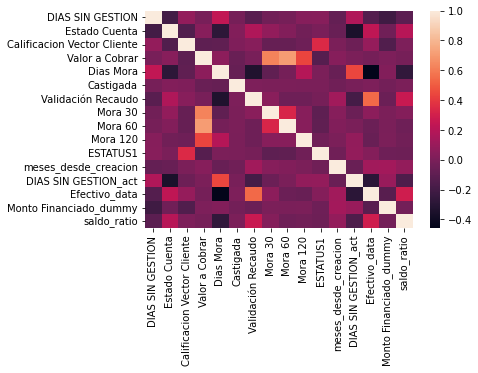

In [24]:
sns.heatmap(dd.corr())

In [25]:
cols=['Valor a Cobrar','Dias Mora',
        'Calificacion Vector Cliente',
        'DIAS SIN GESTION','No. Cuotas Facturadas']

In [26]:
dd['No. Cuotas Facturadas']=pd.to_numeric(dd['No. Cuotas Facturadas'],errors='coerce').fillna(0)

In [27]:
dd['No. Cuotas Facturadas']=dd['No. Cuotas Facturadas'].astype(float)

In [28]:
dd[dd.filter(like='Mora ').columns]=dd[dd.filter(like='Mora ').columns].astype(float)

In [29]:
dd['Antiguedad de Producto']=dd['Antiguedad de Producto'].str.upper().str.translate(str.maketrans('ÁÉÍÓÚ','AEIOU'))\
                        .str.replace('ANTIGUA','ANTIGUO')

In [30]:
dd.columns.to_frame().to_csv('D:\Proyecto Movil\Modelo 2\columnas_antes_consolidar.csv')

In [31]:
#dd['Desc_codigo_ult_ges'].value_counts(True).head(15).sum()

In [32]:
dic_ges={'COMPROMISO DE PAGO':'PROMESA DE PAGO',
         'MENSAJE CON TERCEROS CASA':'SE DEJO MENSAJE CON TERCERO',
        'PAGO REALIZADO':'YA PAGO','Ã±':'NA'}
dd['Desc_codigo_ult_ges']=dd['Desc_codigo_ult_ges'].str.upper().replace(dic_ges).str.replace('Ã±','N').str.lstrip().str.replace('Ñ','N')
dd['des_traslado']=dd['des_traslado'].str.upper().str.replace('(.*)\_.*', '\\1').str.lstrip()
dd['Autopago'][dd['Autopago']=='Convergente']=np.nan
dd['Autopago'][dd['Autopago']==' ']=np.nan
dd['Tipo Documento']=np.where(dd['Tipo Documento'].isin(['CC','NIT','CE']),dd['Tipo Documento'],"CC")
dd['Canal B2B'][dd['Canal B2B']=='nan']=np.nan
dd['Canal B2B'].fillna('SIN REGISTRO',inplace=True)
dd['Canal B2B'][dd['Canal B2B']=='nan']=np.nan
dd['Canal B2B'].fillna('SIN REGISTRO',inplace=True)
dd['Antiguedad de Producto'][dd['Antiguedad de Producto']=='nan']=np.nan
dd['Antiguedad de Producto'].fillna('SIN REGISTRO',inplace=True)
dd['Marca Portafolio'][dd['Marca Portafolio']=='nan']=np.nan
dd['Marca Portafolio'][dd['Marca Portafolio']=='']=np.nan
dd['Marca Portafolio'].fillna('SIN REGISTRO',inplace=True)
dd['Marca Portafolio']=dd['Marca Portafolio'].str.replace('_',' ')
dd['Tipificacion Cliente'][dd['Tipificacion Cliente']=='nan']='SIN REGISTRO'

dd['Autopago'] = (dd['Autopago']=="TC").astype(int)

C:\Users\scadacat\AppData\Local\Temp/ipykernel_7984/2951715332.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dd['Autopago'][dd['Autopago']=='Convergente']=np.nan
C:\Users\scadacat\AppData\Local\Temp/ipykernel_7984/2951715332.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dd['Autopago'][dd['Autopago']==' ']=np.nan
C:\Users\scadacat\AppData\Local\Temp/ipykernel_7984/2951715332.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [33]:
listaa=dd['Desc_codigo_ult_ges'].value_counts(True).head(15).index

In [34]:
dd['Desc_codigo_ult_ges']=np.where(dd['Desc_codigo_ult_ges'].isin(listaa),dd['Desc_codigo_ult_ges'],"OTRA GESTION")

In [35]:
listaa.to_frame().to_csv('D:\Proyecto Movil\Modelo 2\listas_isin_des_ult_ges.csv')

In [36]:
listaa2=dd['Analisis Vector'].value_counts(True).head(20).index
dd['Analisis Vector']=np.where(dd['Analisis Vector'].isin(listaa2),dd['Analisis Vector'],"OTRO VECTOR")
listaa2.to_frame().to_csv('D:\Proyecto Movil\Modelo 2\listas_isin_vector.csv')

In [37]:
types = pd.DataFrame(dd.dtypes)
print("Tipos de variables", types.groupby(0).size())

consolidado = dd.replace({False: 0, True: 1})

types = pd.DataFrame(consolidado.dtypes)
print("Tipos de variables luego de reemplazo",types.groupby(0).size())

Tipos de variables 0
int32       8
float64    15
object     14
dtype: int64
Tipos de variables luego de reemplazo 0
int32       8
float64    15
object     14
dtype: int64


In [38]:
categoricas = types.index[types[0] == 'O'].values
for line in categoricas:
 print("La variable "+ line +" contiene:",str(len(consolidado[line].unique()))+" distinct values")

La variable Desc_codigo_ult_ges contiene: 16 distinct values
La variable Perfil Digital contiene: 6 distinct values
La variable Vector Cualitativo Contrato contiene: 5 distinct values
La variable Analisis Vector contiene: 21 distinct values
La variable Tipificacion Cliente contiene: 5 distinct values
La variable Edad de Mora contiene: 7 distinct values
La variable Tipo Plan contiene: 8 distinct values
La variable Tipo Inventario contiene: 5 distinct values
La variable Tipo Documento contiene: 3 distinct values
La variable des_traslado contiene: 13 distinct values
La variable Canal B2B contiene: 6 distinct values
La variable Marca Portafolio contiene: 12 distinct values
La variable Antiguedad de Producto contiene: 4 distinct values
La variable Cod. Status Billing contiene: 3 distinct values


In [39]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
#Se define función que captura el dataframe y la columna para retornar un dataframe luego de OHE
def crea_OneHotEncoding(df, columna):
  le = LabelEncoder()
  le_ajustado=le.fit_transform(df[columna]).reshape(-1,1)
  encoder = OneHotEncoder(sparse=False)
  column = [columna+ "_"+ str(i) for i in le.classes_]
  data = encoder.fit_transform(le_ajustado)
  return(pd.DataFrame(data,columns =column))

In [40]:
numeric_columns = list(set(types.index[types[0] !="Object"].values)-set(['Efectivo_data']))
variables_consolidadas = consolidado[numeric_columns]
objetivo = consolidado["Efectivo_data"]

categoricas = types.index[types[0] == 'O'].values
for column in categoricas:
  df = crea_OneHotEncoding(consolidado,column)
  variables_consolidadas = pd.concat([variables_consolidadas,df],axis=1)
  print("Columna ",column, " transformada!")

print("Tamaño final del dataset transformado:",variables_consolidadas.shape)

Columna  Desc_codigo_ult_ges  transformada!
Columna  Perfil Digital  transformada!
Columna  Vector Cualitativo Contrato  transformada!
Columna  Analisis Vector  transformada!
Columna  Tipificacion Cliente  transformada!
Columna  Edad de Mora  transformada!
Columna  Tipo Plan  transformada!
Columna  Tipo Inventario  transformada!
Columna  Tipo Documento  transformada!
Columna  des_traslado  transformada!
Columna  Canal B2B  transformada!
Columna  Marca Portafolio  transformada!
Columna  Antiguedad de Producto  transformada!
Columna  Cod. Status Billing  transformada!
Tamaño final del dataset transformado: (133285, 150)


In [41]:
qc=variables_consolidadas['Valor a Cobrar'].quantile(0.982)
variables_consolidadas['Valor a Cobrar']= np.where(variables_consolidadas["Valor a Cobrar"] > qc, qc ,variables_consolidadas["Valor a Cobrar"])
#
pd=variables_consolidadas['Dias Mora'].quantile(0.99)
variables_consolidadas['Dias Mora']= np.where(variables_consolidadas['Dias Mora'] > pd, pd ,variables_consolidadas['Dias Mora'])
# nv=variables_consolidadas['No. Facturas Vencidas'].quantile(0.99)
# variables_consolidadas['No. Facturas Vencidas']= np.where(variables_consolidadas['No. Facturas Vencidas'] > nv, nv ,variables_consolidadas['No. Facturas Vencidas'])
m14=variables_consolidadas['DIAS SIN GESTION'].quantile(0.98)
variables_consolidadas['DIAS SIN GESTION']= np.where(variables_consolidadas['DIAS SIN GESTION'] > m14, m14 ,variables_consolidadas['DIAS SIN GESTION'])
m16=variables_consolidadas['Mora 60'].quantile(0.80)
variables_consolidadas['Mora 60']= np.where(variables_consolidadas['Mora 60'] > m16, m16 ,variables_consolidadas['Mora 60'])

m17=variables_consolidadas['Mora 120'].quantile(0.80)
variables_consolidadas['Mora 120']= np.where(variables_consolidadas['Mora 120'] > m17, m17 ,variables_consolidadas['Mora 120'])

m30=variables_consolidadas['Mora 30'].quantile(0.80)
variables_consolidadas['Mora 30']= np.where(variables_consolidadas['Mora 30'] > m30, m30 ,variables_consolidadas['Mora 30'])
m30=variables_consolidadas['saldo_ratio'].quantile(0.85)
variables_consolidadas['saldo_ratio']= np.where(variables_consolidadas['saldo_ratio'] > m30, m30 ,variables_consolidadas['saldo_ratio'])

In [42]:
variables_consolidadas['meses_desde_creacion'].fillna(variables_consolidadas['meses_desde_creacion'].median(),inplace=True)
variables_consolidadas['saldo_ratio']=variables_consolidadas['saldo_ratio'].replace([np.inf, -np.inf], np.nan)
variables_consolidadas['saldo_ratio'].fillna(variables_consolidadas['saldo_ratio'].median(),inplace=True)

In [43]:
variables_consolidadas.to_parquet("D:\Proyecto Movil\Modelo 2\df_mobile.parquet.gzip")

In [44]:
scaler = StandardScaler()
variables_consolidadas[['Calificacion Vector Cliente','DIAS SIN GESTION_act',
    'DIAS SIN GESTION','Mora 60','Mora 120','Mora 30','saldo_ratio',
    'Dias Mora','meses_desde_creacion','Valor a Cobrar']]=\
        scaler.fit_transform(
            variables_consolidadas[['Calificacion Vector Cliente','DIAS SIN GESTION_act',
    'DIAS SIN GESTION','Mora 60','Mora 120','Mora 30','saldo_ratio',
    'Dias Mora','meses_desde_creacion',
  'Valor a Cobrar']])

In [45]:
variables_consolidadas.drop(['Canal B2B_SIN REGISTRO',
                            'Canal B2B_SIN REGISTRO','Tipo Inventario_Cliente B2B',
                            'Cod. Status Billing_10103','Desc_codigo_ult_ges_PROMESA DE PAGO',
                            'Tipo Documento_NIT','Analisis Vector_PAGO OPORTUNO','Cod. Status Billing_10102',
                            'Tipificacion Cliente_SIN REGISTRO',
                            'Desc_codigo_ult_ges_RETIRO POR CUMPLIMIENTO DE CRITERIOS','Tipificacion Cliente_SERVICIO RETIRADO',
                            'Tipo Documento_NIT','Tipo Inventario_Tradicional',
                            'Mora 60','Mora 30','Tipo Documento_CC',
                            'Analisis Vector_SIN VECTOR','Edad de Mora_Mora > 360','Vector Cualitativo Contrato_SIN COMPORTAMIENTO',
                            'Canal B2B_MICRO/SMALL','Edad de Mora_Mora 120','Mora 270','Mora 240',
                            'Desc_codigo_ult_ges_RETIRO POR CUMPLIMIENTO DE CRITERIOS'],axis=1,inplace=True)
variables_consolidadas.drop(categoricas,axis=1,inplace=True)

<AxesSubplot:>

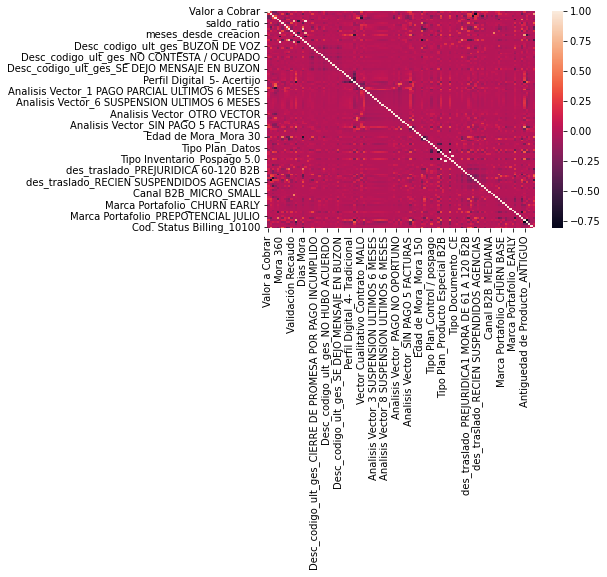

In [46]:
sns.heatmap(variables_consolidadas.corr())

In [47]:
cor=variables_consolidadas.corr().unstack().sort_values().drop_duplicates()

In [64]:
cor=cor.to_frame()

AttributeError: 'DataFrame' object has no attribute 'to_frame'

In [49]:
cor=cor.reset_index()

In [50]:
cor.drop_duplicates(['level_0','level_1'],inplace=True)

In [51]:
cor['new']=cor['level_0']==cor['level_1']

In [52]:
cor[(cor['new']!=True) &(cor[0]>0.30)].head(60)#['level_0'].to_list

,level_0,level_1,0,new
6286,Antiguedad de Producto_ANTIGUO,Vector Cualitativo Contrato_REGULAR,0.300620,False
6287,Marca Portafolio_NO CHURN,Desc_codigo_ult_ges_CARTERA ASIGNADA PARA COBRO,0.301453,False
6288,des_traslado_PROXIMOS A SUSPENDER,Cod. Status Billing_10100,0.306582,False
6289,Analisis Vector_PAGO OPORTUNO Y NO OPORTUNO,Calificacion Vector Cliente,0.309628,False
6290,Validación Recaudo,saldo_ratio,0.311693,False
6291,des_traslado_PROXIMOS A SUSPENDER AGENCIAS,Marca Portafolio_CHURN BASE,0.311974,False
6292,Marca Portafolio_SIN REGISTRO,des_traslado_PROXIMOS CANCELADOS,0.313259,False
6293,Edad de Mora_Mora 30,Desc_codigo_ult_ges_CARTERA ASIGNADA PARA COBRO,0.316517,False
6294,des_traslado_PROXIMOS A SUSPENDER AGENCIAS,Estado Cuenta,0.323735,False
6295,Tipificacion Cliente_SERVICIO EXISTENTE,Tipo Inventario_Pospago 5.0,0.326675,False


In [53]:
variables_consolidadas.drop([
                'Mora 330','Mora 120','Mora Mayor 360',
                'Cod. Status Billing_10100',
                'Tipificacion Cliente_nan'],axis=1,inplace=True)

In [54]:
variables_consolidadas['saldo_ratio'].fillna(variables_consolidadas['saldo_ratio'].median(),inplace=True)

In [55]:
variables_consolidadas['saldo_ratio_log']=(variables_consolidadas['saldo_ratio']+1).transform(np.log).fillna((variables_consolidadas['saldo_ratio']+1).transform(np.log).median())
variables_consolidadas['Dias Mora_log']=(variables_consolidadas['Dias Mora']-variables_consolidadas['Dias Mora'].min()+1).transform(np.log)

In [56]:
os.getcwd()

'\\\\10.1.1.7\\01 Oficina Planeación y Control\\01 Analytics\\Stiven\\Cobranzas'

In [57]:
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score,accuracy_score,make_scorer
from sklearn.model_selection import StratifiedKFold,RandomizedSearchCV,train_test_split,cross_val_score,KFold,GridSearchCV

In [58]:
#Entrenamiento y prueba con relación 80:20
x_train, x_test, y_train, y_test = train_test_split(variables_consolidadas,objetivo, test_size=0.25,random_state=90)
#Entrenamiento y validación con relación 90:10
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train, test_size=0.1, random_state=90)

print("Shape of x_train:",x_train.shape)
print("Shape of x_test:",x_test.shape)
print("Shape of x_val:",x_val.shape)
print("Shape of y_train:",y_train.shape)
print("Shape of y_test:",y_test.shape)
print("Shape of y_val:",y_val.shape)

Shape of x_train: (89966, 112)
Shape of x_test: (33322, 112)
Shape of x_val: (9997, 112)
Shape of y_train: (89966,)
Shape of y_test: (33322,)
Shape of y_val: (9997,)


In [59]:
# check and remove constant columns
colsToRemove = []
for col in x_train.columns:
    if col != 'ID' and col != 'target':
        if x_train[col].std() == 0: 
            colsToRemove.append(col)
        
# remove constant columns in the training set
x_train.drop(colsToRemove, axis=1, inplace=True)

# remove constant columns in the test set
x_test.drop(colsToRemove, axis=1, inplace=True) 
x_val.drop(colsToRemove, axis=1, inplace=True) 


print("Removed `{}` Constant Columns\n".format(len(colsToRemove)))
print(colsToRemove)

Removed `0` Constant Columns

[]


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [60]:
%%time
def duplicate_columns(frame):
    groups = frame.columns.to_series().groupby(frame.dtypes).groups
    dups = []

    for t, v in groups.items():

        cs = frame[v].columns
        vs = frame[v]
        lcs = len(cs)

        for i in range(lcs):
            ia = vs.iloc[:,i].values
            for j in range(i+1, lcs):
                ja = vs.iloc[:,j].values
                if np.array_equal(ia, ja):
                    dups.append(cs[i])
                    break

    return dups

colsToRemove = duplicate_columns(x_train)
print(colsToRemove)

['Tipo Plan_Pospago 5.0', 'Tipo Plan_Venta Plazos']
Wall time: 620 ms


In [61]:
# remove duplicate columns in the training set
x_train.drop(colsToRemove, axis=1, inplace=True) 

x_test.drop(colsToRemove, axis=1, inplace=True) 
# x_val.drop(colsToRemove, axis=1, inplace=True) 


print("Removed `{}` Duplicate Columns\n".format(len(colsToRemove)))
print(colsToRemove)

Removed `2` Duplicate Columns

['Tipo Plan_Pospago 5.0', 'Tipo Plan_Venta Plazos']


In [63]:
from imblearn.combine import SMOTETomek ## Imbalance dataset 
from imblearn.over_sampling import SMOTE

In [65]:
sm = SMOTE(random_state = 42)
columns = x_train.columns
## Aplicando el balanceo de datos, solo a la data de entrenamiento
train_data_X,train_data_y=sm.fit_resample(x_train, y_train.values.ravel()) #bien

In [69]:
train_data_X.columns.to_frame().to_csv('D:\Proyecto Movil\Modelo 2\columnas.csv')

In [66]:
#train_data_X = pd.DataFrame(data=train_data_X,columns=columns)
#train_data_y= pd.DataFrame(data=train_data_y)

In [67]:
kf = KFold(n_splits=5) ## kfold Cross validation

In [68]:
xgboost = XGBClassifier(max_depth=5,learning_rate=0.001, n_estimators=150, gamma=0.5,colsample_bytree=0.5,subsample=0.6)

model=xgboost.fit(train_data_X, train_data_y)
preds = model.predict(x_test)

accuracy = (preds == y_test).sum().astype(float) / len(preds)*100

print("XGBoost accuracy es: %3.2f" % (accuracy)) ##
from sklearn.metrics import classification_report
print(classification_report(y_test, preds))

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:44:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost accuracy es: 84.81
              precision    recall  f1-score   support

           0       0.94      0.84      0.89     24447
           1       0.67      0.86      0.75      8875

    accuracy                           0.85     33322
   macro avg       0.81      0.85      0.82     33322
weighted avg       0.87      0.85      0.85     33322



<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

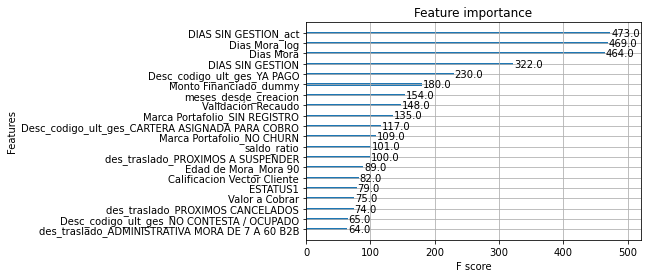

In [71]:
from xgboost import plot_importance
plot_importance(model, max_num_features=20)
#plt.show()

[[20592  3855]
 [ 1201  7674]]


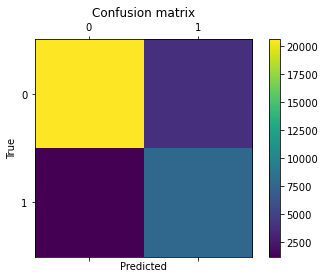

In [72]:
cm = confusion_matrix(y_test, preds)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix')
fig.colorbar(cax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [73]:
import pickle
file_name = "xgb_mod_1.pkl"
#D:\Proyecto Movil\Modelo 2\

# save
pickle.dump(model, open(file_name, "wb"))


# load
xgb_model_loaded = pickle.load(open(file_name, "rb"))

In [74]:
train_data_X.to_csv("D:\Proyecto Movil\Dataset_x_mod_1.csv",sep=';',encoding='utf-8',index=False)

In [75]:
## tuneado de hiper parametros
params={
 "n_estimators"     : [100,150,200],
 "learning_rate"    : [0.005, 0.01, 0.015, 0.0001,0.02 ] ,
 "max_depth"        : [ 6,8,10,15],
 "min_child_weight" : [ 1, 3, 5, 7,5],
 "gamma"            : [ 0.3, 0.4,0.6],
 "colsample_bytree" : [0.5 , 0.7 ,0.9],
 "subsample"        : [0.5,0.8,0.9],
 "reg_lambda"       : [1,2]
 }
scoring = {       'f1_score' : make_scorer(f1_score, average = 'micro')}
kf = KFold(n_splits=3)

In [76]:
xgboost = XGBClassifier(random_state=42)
kf = KFold(n_splits=3)
random_search=RandomizedSearchCV(estimator = xgboost,param_distributions=params,
                                    n_iter=3,scoring='f1_weighted',n_jobs=-1,cv=kf,verbose=3,refit=True)

In [77]:
random_search.fit(train_data_X, train_data_y)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:25:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=KFold(n_splits=3, random_state=None, shuffle=False),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False, gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_ch...
                                           subsample=None, tree_method=None,
                                           validate_parameters=None,
                                           verbosity=None),
                  

In [82]:
print(random_search.best_estimator_)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5,
              enable_categorical=False, gamma=0.4, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.02, max_delta_step=0, max_depth=15,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, predictor='auto',
              random_state=42, reg_alpha=0, reg_lambda=2, scale_pos_weight=1,
              subsample=0.5, tree_method='exact', validate_parameters=1,
              verbosity=None)


In [83]:
print("Using hyperparameters --> \n", random_search.best_params_)

Using hyperparameters --> 
 {'subsample': 0.5, 'reg_lambda': 2, 'n_estimators': 100, 'min_child_weight': 1, 'max_depth': 15, 'learning_rate': 0.02, 'gamma': 0.4, 'colsample_bytree': 0.5}


In [84]:
classi=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5,
              enable_categorical=False, gamma=0.4, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.02, max_delta_step=0, max_depth=15,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, predictor='auto',
              random_state=42, reg_alpha=0, reg_lambda=2, scale_pos_weight=1,
              subsample=0.5, tree_method='exact', validate_parameters=1,
              verbosity=None)
model2=classi.fit(train_data_X, train_data_y)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:30:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [85]:
y_hats = model2.predict(x_test)#[:,1]
from sklearn.metrics import classification_report
print(classification_report(y_test, y_hats))

              precision    recall  f1-score   support

           0       0.95      0.92      0.94     24447
           1       0.80      0.88      0.84      8875

    accuracy                           0.91     33322
   macro avg       0.88      0.90      0.89     33322
weighted avg       0.91      0.91      0.91     33322



In [86]:
skf = KFold(n_splits=4)
from sklearn.model_selection import cross_val_score
score=cross_val_score(classi,variables_consolidadas[train_data_X.columns],objetivo,cv=skf,n_jobs=5)

In [87]:
np.mean(score)

0.9088718878292753

In [88]:
model2.save_model("D:\Proyecto Movil\Modelo 2\model2_tun.json")

In [89]:
os.getcwd()

'\\\\10.1.1.7\\01 Oficina Planeación y Control\\01 Analytics\\Stiven\\Cobranzas'

In [90]:
os.chdir(r"D:\Proyecto Movil\Modelo 2")

In [91]:
import pickle
file_name = "xgb_mod_v2.pkl"

# save
pickle.dump(model2, open(file_name, "wb"))


[[22474  1973]
 [ 1095  7780]]


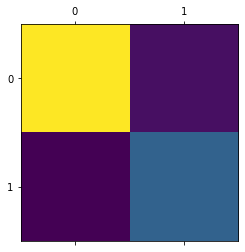

In [92]:
cm = confusion_matrix(y_test, y_hats)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

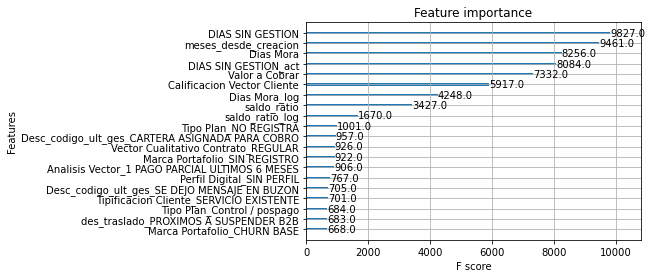

In [93]:
from xgboost import plot_importance
plot_importance(model2, max_num_features=20)

In [94]:
from sklearn.metrics import roc_auc_score

In [95]:
predictions = model2.predict_proba(x_test)[:,1]
roc = roc_auc_score(y_test, predictions)
print("AUC: %.4f%% " % (roc * 100))   # prints AUC: 89.2% 

AUC: 95.6153% 


[[22474  1973]
 [ 1095  7780]]


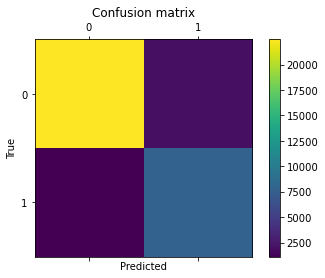

In [96]:
cm = confusion_matrix(y_test, y_hats)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix')
fig.colorbar(cax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

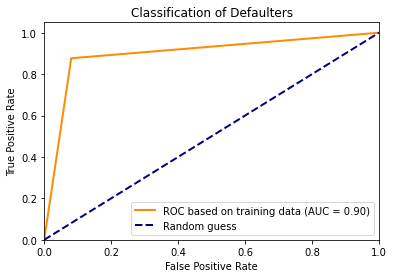

In [97]:
from sklearn.metrics import roc_curve, auc, accuracy_score
#%matplotlib inline
#Next we plot the ROC curve:
roc_vs = roc_curve(y_test, y_hats)
auc_vs = auc( roc_vs[0], roc_vs[1] )

plt.figure()
line_width = 2
plt.plot(roc_vs[0], roc_vs[1], color='darkorange', lw=line_width,
         label=f"ROC based on training data (AUC = {auc_vs:0.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=line_width, linestyle='--', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Classification of Defaulters')
plt.legend(loc='lower right')
plt.show()

In [98]:
from matplotlib import pyplot

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.92903	validation_0-error:0.11304	validation_0-logloss:0.68007	validation_1-auc:0.91990	validation_1-error:0.12979	validation_1-logloss:0.68043
[1]	validation_0-auc:0.93829	validation_0-error:0.10685	validation_0-logloss:0.66910	validation_1-auc:0.92648	validation_1-error:0.11998	validation_1-logloss:0.66980
[2]	validation_0-auc:0.95041	validation_0-error:0.09346	validation_0-logloss:0.65614	validation_1-auc:0.93801	validation_1-error:0.10840	validation_1-logloss:0.65735
[3]	validation_0-auc:0.95167	validation_0-error:0.09241	validation_0-logloss:0.64441	validation_1-auc:0.93965	validation_1-error:0.10588	validation_1-logloss:0.64593
[4]	validation_0-auc:0.95472	validation_0-error:0.08882	validation_0-logloss:0.63295	validation_1-auc:0.94276	validation_1-error:0.10329	validation_1-logloss:0.63488
[5]	validation_0-auc:0.95502	validation_0-error:0.08869	validation_0-logloss:0.62189	validation_1-auc:0.94337	validation_1-error:0.10249	validation_1-logloss:0.62409
[6]	

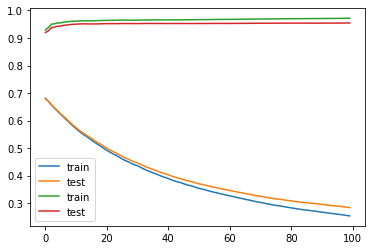

In [99]:
# define the datasets to evaluate each iteration
evalset = [(x_train, y_train), (x_test,y_test)]
# fit the model
eval_metric = ["auc","error","logloss"]

classi.fit(x_train, y_train, eval_metric=eval_metric, eval_set=evalset)
# evaluate performance
yhat = classi.predict(x_test)
score = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % score)
print('Accuracy: %.3f' % score)

# retrieve performance metrics
results = classi.evals_result()
# plot learning curves
pyplot.plot(results['validation_0']['logloss'], label='train')
pyplot.plot(results['validation_1']['logloss'], label='test')
pyplot.plot(results['validation_0']['auc'], label='train')
pyplot.plot(results['validation_1']['auc'], label='test')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [100]:
## Validación overfitting
# print the scores on training and test set

print('Training set score: {:.4f}'.format(classi.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(classi.score(x_test, y_test)))

Training set score: 0.9274
Test set score: 0.9065


In [101]:
import shap  # package used to calculate Shap values
import matplotlib.pyplot as plt

# Create object that can calculate shap values
explainer = shap.TreeExplainer(classi)

In [ ]:
shap_values = explainer.shap_values(x_test) 

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [ ]:
shap.summary_plot(shap_values, x_test)

In [ ]:
variables_consolidadas.head(1)

In [ ]:
### SI A ELLOS LE PAGARON SI LA CARTERA QUE TUVO ESTUVO CON selrefin anotar por que ceñl le pagó
## si a ellos les pagaron los bombardeo con asesor... los bombardeo 

### Seguimiento contra pagos d elas otras agencias....






## Home y Móvil
##
### C que do con esa tarea...
